In [33]:
import pandas as pd

# Forecasting
Se pueden utilizar los datos del pasado para predecir los datos del futuro. Uno de los mejores métodos para la predicción, es la **regresión lineal**.

Vamos a utilizar los datos de un modelo de negocios estándar: compra y venta de vehículos a bajo precio y su reventa a mayor precio.

## Cleaning the data
Vamos a cargar el dataset.

In [34]:
carsales = pd.read_csv('d:\\cursos\\data_science\\data\\carsales.csv')
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


Vamos a ajustar algunos aspectos del dataset para un mejor desempeño.

In [35]:
carsales.columns = ['month', 'sales']
carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


Removemos la última fila que no contiene datos.

In [36]:
carsales = carsales.loc[0:107, :].copy()
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


Otro aspecto a destacar es el formato de fechas. En los datasets los formatos de fechas suelen ser problemáticos, puesto que pueden estar en formatos distintos del numérico, además pueden no seguir la lógica de una fecha (para los meses 12 + 1 = 1). 

In [37]:
carsales['period'] = list(range(108))
carsales.head()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4


## Plotting data to find trends
Es buena práctica *visualizar* los datos pronto para encontrar patrones.

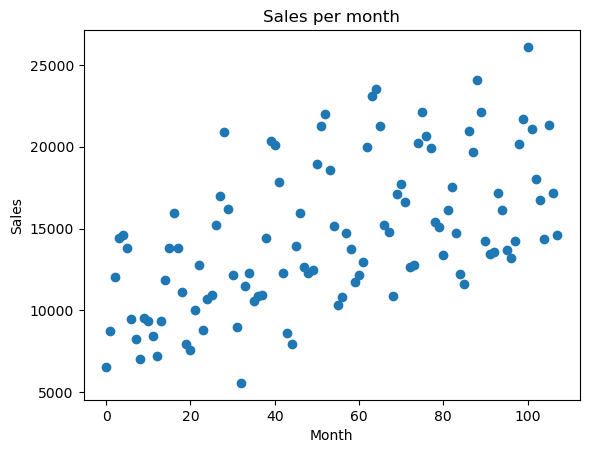

In [38]:
import matplotlib.pyplot as plt
plt.scatter(carsales['period'], carsales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per month')
plt.show()

## Regresión lineal
La regresión lineal es una técnica para poner orden en el caos. A veces se denomina la línea de mejor encaje, debido a que representa una línea en la que ningún dato está particularmente alejado de la *regresión*.

Es importante tener en cuenta que la estructuración de los datos es importante para el algoritmo, por ejemplo, en este caso es cómodo interpretar 108 observaciones con una medida de una variable, (108 × 1).

In [39]:
x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

Ejecutemos la regresión:

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

## Álgebra en la regresión lineal
La línea de regresión tiene la estructura de una recta:
$$y=mx+b$$
donde
* La pendiente $m$ representa `coef_`.
* La intersección $b$ representa `intercept_`.

In [41]:
print(regressor.intercept_)
print(regressor.coef_)

[10250.77726809]
[[81.20250174]]


En nuestro estudio, el *modelo* se interpreta con el hecho de que inicialmente las ventas son de 10250, y podemos esperar vender 81 vehículos más que el mes anterior. ¿Por qué es esta la mejor elección para los valores de $m$ y $b$? Supongamos una línea de hipótesis:

$$y=125x+8000$$

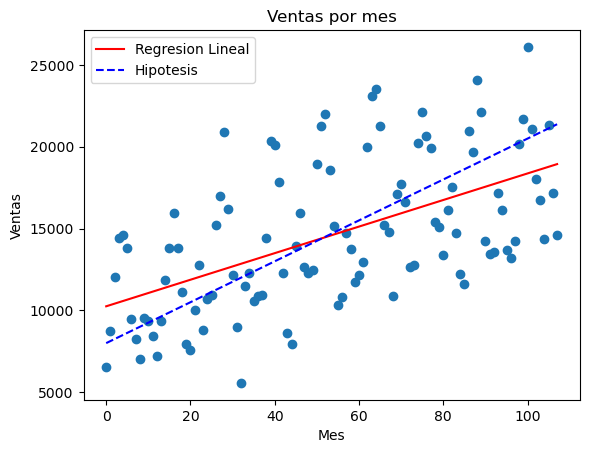

In [42]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'], [81.2 * i + 10250 for i in carsales['period']], 'r-',label='Regresion Lineal')
plt.plot(carsales['period'], [125 * i + 8000 for i in carsales['period']], 'b--',label='Hipotesis')
plt.legend(loc='upper left')
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

## Errores de medición
Vamos a *demostrar* que la línea de regresión es mejor que la línea de hipótesis. Podemos calcular la diferencia entre la estimación de ambas líneas y el valor real de las ventas en un periodo:

$$e_i=|y_i-y_i'|$$

In [43]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250 for i in carsales['period']]
hipothetizedline = [125 * i + 8000 for i in carsales['period']]
error1 = [(x-y) for x,y in zip(regressionline, saleslist)]
error2 = [(x-y) for x,y in zip(hipothetizedline, saleslist)]

Podemos calcular el promedio de cada error en ambas líneas:

In [44]:
import numpy as np
error1abs = [abs(value) for value in error1]
error2abs = [abs(value) for value in error2]
print('Error 1:',np.mean(error1abs))
print('Error 2:',np.mean(error2abs))

Error 1: 3154.2259259259263
Error 2: 3239.777777777778


Como hemos calculado los valores absolutos, esta técnica de error de medición se conoce como *mean absolute error* (MAE), o media del error absoluto. Otra técnica son los mínimos cuadrados:
$$e_i=(y_i-y_i')^2$$

In [45]:
error1square = [(value**2) for value in error1]
error2square = [(value**2) for value in error2]
print('Error 1:',np.sqrt(np.mean(error1square)))
print('Error 2:',np.sqrt(np.mean(error2square)))

Error 1: 3725.4913292671135
Error 2: 3968.900519455399


Vamos a añadir funciones para medir errores RMSE y MAE:

In [77]:
def get_mae(line, actual):
    error = [(x-y) for x,y in zip(line,actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabs)
    return mae

def get_rmse(line, actual):
    error = [(x-y) for x,y in zip(line,actual)]
    error_square = [values**2 for values in error]
    rmse = np.sqrt(np.mean(error_square))
    return rmse

## Forecasting future trends
Para predecir tendencias futuras hay que extender la línea de regresión. Ejecutamos el siguiente código para agregar más meses al periodo registrado.

In [46]:
x_extended = np.append(carsales['period'], np.arange(108,116))

Generamos la predicción para la línea de regresión:

In [47]:
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)

Veámos la nueva gráfica:

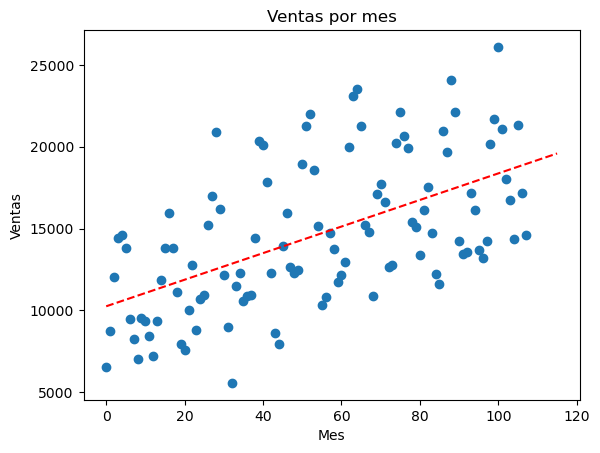

In [48]:
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x_extended, extended_prediction, 'r--')
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

## Regresión lineal multivariada
Al establecer la regresión lineal utilizamos una variable, sin embargo podríamos utilizar otras además del año, como precios, inflación, etc. Aunque no poseamos otras variables, aún podemos considerar por ejemplo el periodo al cuadrado, al cubo, logaritmos u otras. El problema se puede escribir como encontrar nuevas pendientes e intersecciones:

$$y=m_1x_1+m_2x_2+\cdots+m_nx_n+b$$

En este ejemplo utilizamos la misma variable $x$ que representa el periodo:

$$y=m_1x+m_2x^2+m_3x^3+b$$

Nuestra regresión se convierte en un polinomio cúbico.

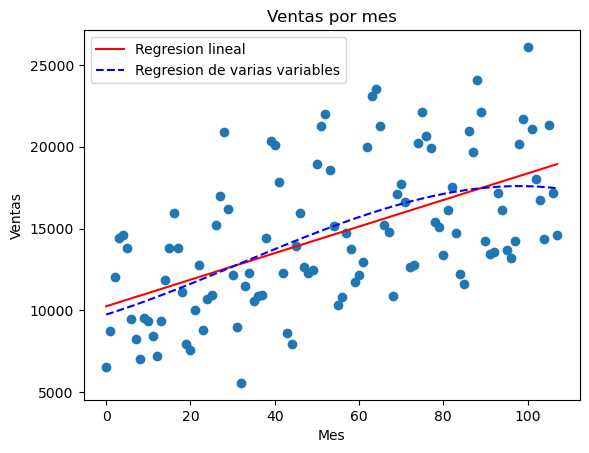

In [49]:
carsales['cuadratic'] = carsales['period'].apply(lambda x: x**2)
carsales['cubic'] = carsales['period'].apply(lambda x: x**3)
x3 = carsales.loc[:, ['period', 'cuadratic', 'cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

# Regresion
regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x, regressor.predict(x), 'r-', label='Regresion lineal')
plt.plot(x, regressor_cubic.predict(x3), 'b--', label='Regresion de varias variables')
plt.title('Ventas por mes')
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()

## Trigonometría para las variaciones

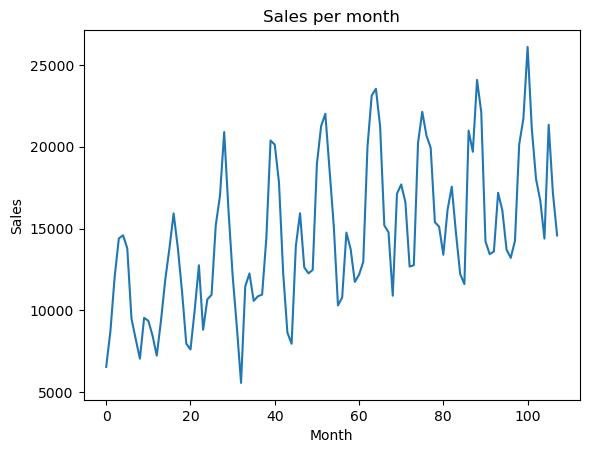

In [50]:
plt.plot(carsales['period'], carsales['sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per month')
plt.show()

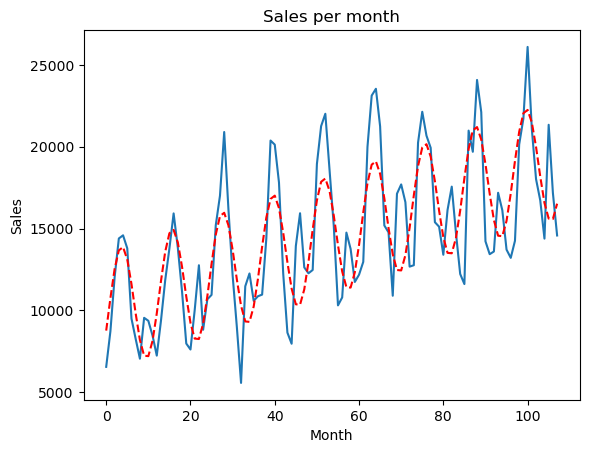

In [66]:
import math
carsales['sin_period'] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period'] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'], carsales['sales'])
plt.plot(x, regressor_trig.predict(x_trig), 'r--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per month')
plt.show()

## Mejor modelo
En general podemos encontrar diferentes modelos para predecir los resultados en nuestro escenario. Un posible error sería incluir demasiadas variables irrelevantes para nuestro modelo. Por ejemplo, aquí incluimos un modelo que *parece* tener una tasa de error baja.

In [80]:
carsales['squareroot']=carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15']=carsales['period'].apply(lambda x: x**1.5)
carsales['log']=carsales['period'].apply(lambda x: math.log(x+1))

x_complex = carsales.loc[:,['period','log','sin_period','cos_period','squareroot',
                            'exponent15','log','cuadratic', 'cubic']].values.reshape(-1,9)
regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)

complex_line = [prediction for sublist in regressor_complex.predict(x_complex)\
               for prediction in sublist] # Arreglo de elementos, y NO arreglo de arreglos
get_rmse(complex_line, saleslist)

2610.3938122978857

Aunque parezca una mejor opción, la realidad es que el modelo tiene un **sobreajuste**. Una estrategia para mejorar el análisis de los modelos es dividir los datos disponibles en *datos de entrenamiento* y *datos de prueba*.
* 

In [62]:
x_complex_train = carsales.loc[0:80,['period','log','sin_period','cos_period','squareroot', \
                                     'exponent15','log','cuadratic', 'cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80, 'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107, ['period','log','sin_period','cos_period','squareroot',
                                       'exponent15','log','cuadratic', 'cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107, 'sales'].values.reshape(-1,1)
regressor_complex.fit(x_complex_train, y_train)

LinearRegression()

In [78]:
# Regresion lineal
x_train = carsales.loc[0:80, 'period'].values.reshape(-1,1)
x_test = carsales.loc[81:107, 'period'].values.reshape(-1,1)
# Regresion trigonometrica
x_trig_train = carsales.loc[0:80, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
# Prediccion compleja
complex_test_predictions = [prediction for sublist in regressor_complex.predict(x_complex_test)\
                            for prediction in sublist]
# Prediccion lineal
test_predictions = [prediction for sublist in regressor.predict(x_test) for prediction in sublist]
# Prediccion trigonometrica
trig_test_predictions = [prediction for sublist in regressor_trig.predict(x_trig_test) for prediction in\
                        sublist]
print(get_rmse(test_predictions, saleslist[81:107]))
print(get_rmse(complex_test_predictions, saleslist[81:107]))
print(get_rmse(trig_test_predictions, saleslist[81:107]))

4115.614379193305
6006.013164339373
3461.0823292599375
